# Автоматизация сбора данных
### Материалы на вторник, 13.07.2021

**Основная цель:** Собрать данные финансовых и новостных ресурсов, например [finance.yahoo.com](https://finance.yahoo.com/), [investing.com](https://www.investing.com/), [bloomberg](https://www.bloomberg.com/), [binance](https://www.binance.com/). 


**Основная задача данного урока:** ознакомиться с представленными технологиями для сбора данных: [requests](https://docs.python-requests.org/en/master/), [beautifulsoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), [Selenium](https://selenium-python.readthedocs.io/).

**Примечание 1.** 
Сбор данных с некоторых ресурсов может содержать в себе некоторые трудности в виду защиты от парсинга или особенностей реализации. В данном же уроке рассмотрены примеры, лишенные таких недостатков. С целью озакомления предлагается опробовать представленные технологии сначала на простых примерах.

**Примечание 2.** Следует отметить, что приведенны технические средства не являются инструментами лишь сбора данных. Диапазон их применения сильно шире. Однако их удобно использовать и для целей сбора данных =).

**Примечание 3.** Код, приведенный на данной странице необходимо запускать стационарно, с локальной машины. Для удобства использования, все пакетные зависимости, используемые в данном ноутбуке, приведены в файле *requirements.txt*. Для их установки в виртуальное окружение среды *python* можно выполнить:
<pre><code>
pip install -r requirements.txt
</code></pre>

In [1]:
import json
from pprint import pprint

from config import OMDB_API_KEY

# Requests

Библиотека *requests* позволяет работать c *HTTP* запросами *(get, post, put, path, и т.д.)*. Для наших целей достаточно метода get, призванного *получать* данные. В рамках данных библиотеки мы обычно работаем с различными сервисами, предоставляющими *api* (открытыми или закрытыми).

В качестве примера работы с *rest api* и библиотекой *requests* будем рассматривать [The Open Movie Database](https://www.omdbapi.com/). Страница проекта содержит простую документацию и примеры использования, достаточные для наший целей. 

**Примечание.** Для успешного запуска данного кода вам необходимо получить собственный *api key* на [данной странице](https://www.omdbapi.com/apikey.aspx). Ключ предоставляется бесплатно после подтверждения электронной почты. Далее нужно будет вставить ключ в файл *credentials.env*.

In [2]:
import requests

Используя приведенный метод, вытащим всю информацию о фильме по указанному IMDB ID (указывается в url фильма, пример: https://www.imdb.com/title/tt0096438/). 

In [3]:
IMDB_FILM_ID = 'tt0096438'

response = requests.get(f"http://www.omdbapi.com/?apikey={OMDB_API_KEY}&i={IMDB_FILM_ID}&plot=full")
print('Status Code:', response.status_code)

Status Code: 200


Получаем данные в виде *json* строки, сразу жу преобразуем в формат *python dictionary*, используя метод *json.loads*.

In [4]:
film_info = json.loads(response.content)
pprint(film_info)

{'Actors': 'Bob Hoskins, Christopher Lloyd, Joanna Cassidy, Charles Fleischer',
 'Awards': 'Won 3 Oscars. Another 21 wins & 22 nominations.',
 'BoxOffice': '$156,452,370',
 'Country': 'USA, UK',
 'DVD': '13 Dec 2015',
 'Director': 'Robert Zemeckis',
 'Genre': 'Animation, Adventure, Comedy, Crime, Family, Fantasy, Mystery',
 'Language': 'English',
 'Metascore': '83',
 'Plot': "'Toon star Roger is worried that his wife Jessica is playing "
         'pattycake with someone else, so the studio hires detective Eddie '
         'Valiant to snoop on her. But the stakes are quickly raised when '
         'Marvin Acme is found dead and Roger is the prime suspect. '
         'Groundbreaking interaction between the live and animated characters, '
         'and lots of references to classic animation.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMDhiOTM2OTctODk3Ny00NWI4LThhZDgtNGQ4NjRiYjFkZGQzXkEyXkFqcGdeQXVyMTA0MjU0Ng@@._V1_SX300.jpg',
 'Production': 'Touchstone Pictures',
 'Rated': 'PG'

Также изобразим тут постер, ссылка на который представлена в полученной информации.

Who Framed Roger Rabbit 1988


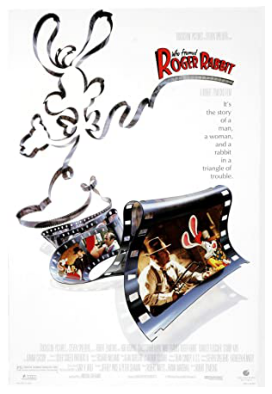

In [5]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread(film_info['Poster'])

plt.figure(figsize = (7, 7))
plt.imshow(image)

plt.axis('off')

print(film_info['Title'], film_info['Year'])
plt.show()

In [6]:
film_info['Plot']

"'Toon star Roger is worried that his wife Jessica is playing pattycake with someone else, so the studio hires detective Eddie Valiant to snoop on her. But the stakes are quickly raised when Marvin Acme is found dead and Roger is the prime suspect. Groundbreaking interaction between the live and animated characters, and lots of references to classic animation."

**Пример.** Приведем пример задачи машинного обучения, которую можно решать, имея подобные данные о фильмах. Мы имеем множество параметров о фильме, включая описание, бюджет и кассовые сборы. На ум сразу приходит следующее: алгоритм, предсказывающий окупится ли фильм в прокате. Таргетную переменную (класс фильма: окупится или нет) можно определить, используя бюджет и сборы.

## Материалы:
* [Документация requests]( https://docs.python-requests.org/en/master/)
* https://www.kaggle.com/andreinovikov90/feature-extraction-and-embeddings-nlp-classify
* [Список](https://betterprogramming.pub/a-curated-list-of-100-cool-and-fun-public-apis-to-inspire-your-next-project-7600ce3e9b3) различных фановых проектов, имеющих апи. Можно использовать, чтобы "поиграться" с библиотекой *requests* или просто в развлекательных целях.

# Beautifulsoup4
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Очень часто интересующая нас информация не продоставляется через открытый *api* сервис, но может публиковаться в интернесте в обычном *html* формате. Сбор таких данных можно автоматизировать, имея инструмент парсинга (локализации тэгов) *html* документа. [beautifulsoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) - как раз такой инструмент.

В случае с *requests* мы занимались парсингом сериализованных данных с *json* документа. Сейчас же будем работать с *html*-разметкой. Основаная задача: вытащить информацию по указаным тэгам и параметрам.

В качестве примера, будем работать с сайтом [kinopoisk.ru](https://www.kinopoisk.ru/). Вытащим название фильма и описание по указанному *id* фильма.

In [7]:
from bs4 import BeautifulSoup

In [8]:
KINOPOISK_ID = '7108'

r = requests.get(f'https://www.kinopoisk.ru/film/{KINOPOISK_ID}/')
soup = BeautifulSoup(r.content, 'html.parser')

In [9]:
title_tag = soup.find("span", {"class": 'styles_title__2l0HH'})
title_tag.text

'Кто подставил кролика Роджера (1988)'

In [10]:
plot_tag = soup.find("div", {"class": 'styles_filmSynopsis__zLClu'})
plot_tag.text

'Частный детектив расследует загадочное преступление, в котором подозревается… мультипликационный персонаж кролик Роджер! Сыщик попадает в непредсказуемый мир, где его ожидают нарисованные злодеи с настоящими револьверами, говорящий автомобиль и соблазнительная мультяшная красотка. Наконец, на горизонте появляется мрачная фигура того, кто подставил кролика Роджера.'

**Задание.** Попрактиковаться, выводя другие поля фильма. К примеру: рейтинг, бюджет, страна. Кроме того, в целях практики можете использовать дюбой другой ресурс, если сочтете его интересным.

# Selenium

* https://selenium-python.readthedocs.io/
* https://en.wikipedia.org/wiki/Selenium_(software)

[Selenium](https://selenium-python.readthedocs.io/) - это инструмент, позволяющий автоматизировать работу браузера. То есть мы можем автоматизировать действия, совершаемые человеком: нажатие на кнопку, ввод текста в поле, выбор из выпадающего текста и т.д.

В данном примере, снова будем рассматривать кинопоиск. Задача: вывести список фильмов, полученных в результате поиска (https://www.kinopoisk.ru/s/") по указанному запросу. Также зададим параметры поиска, используя Selenium.

In [11]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select

**Примечание.** Для использования Selenium необходимо (помимо установки через pip) скачать и установить [chromedriver]( https://chromedriver.chromium.org/downloads), учитывая версию браузера и вид операционной системы.

In [12]:
# данная команда должна открыть браузер, управляемый посредством объекта driver
driver = webdriver.Chrome()
driver.get("https://www.kinopoisk.ru/s/") # переход по ссылке

In [13]:
query = 'анализ рынков' # текст поискового запроса
genre_element = driver.find_element_by_id("m_act[genre]")
genre_select = Select(genre_element)

# выведем названия и значения всех жанров из выпадающего списка
for item in genre_select.options:
    print(item.get_attribute('innerText'), item.get_attribute('value'))

- 
аниме 1750
биография 22
боевик 3
вестерн 13
военный 19
детектив 17
детский 456
для взрослых 20
документальный 12
драма 8
игра 27
история 23
комедия 6
концерт 1747
короткометражка 15
криминал 16
мелодрама 7
музыка 21
мультфильм 14
мюзикл 9
новости 28
приключения 10
реальное ТВ 25
семейный 11
спорт 24
ток-шоу 26
триллер 4
ужасы 1
фантастика 2
фильм-нуар 18
фэнтези 5
церемония 1751


In [14]:
# выберем некоторый жанр
genre_select.select_by_value('10')

In [15]:
# зададим год выхода фильма и нажмен на sumbit (кнопка "поиск")

year = "1969"
driver.find_element_by_id("year").send_keys(year)
driver.find_element_by_class_name("el_18.submit.nice_button").click()

In [16]:
# Возьмем html текст страницы при помощи поля driver.page_source. 
# Далее воспользуемся, упомянутым выше BeautifulSoup для парсинга названий фильмов

soup = BeautifulSoup(driver.page_source, 'html.parser')

In [17]:
search_results = soup.find('div', {'class': 'search_results search_results_last'})

for item in search_results.find_all('p', {'class': 'name'}):
    print(item.text)

Адъютант его превосходительства (мини-сериал) 1969
Белое солнце пустыни 1969
Маугли. Последняя охота Акелы 1969
Приключения канонира Доласа 1969
Кот в сапогах 1969
Беспечный ездок 1969
Князь Игорь 1969
Дикая банда 1969
Красная палатка 1969
Пеппи Длинный чулок 1969


In [18]:
# Закроем браузер
driver.close()